In [69]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, IBMQ
from qiskit import execute
from qiskit import Aer
from qiskit.tools.visualization import circuit_drawer, plot_histogram

In [8]:
def add_EPR_gate(program, q, qubit_number1, qubit_number2):
    program.h(q[qubit_number1])
    program.cx(q[qubit_number1], q[qubit_number2])

    
def add_Bell_measure(program, q, qubit_number1, qubit_number2):
    program.cx(q[qubit_number1], q[qubit_number2])
    program.h(q[qubit_number1])
    
    
def add_scrambling_CZ(program, q, q0, q1, q2):
    program.cz(q[q0], q[q2])
    program.cz(q[q1], q[q2])
    program.cz(q[q0], q[q1])
    program.h(q[q0])
    program.h(q[q1])
    program.h(q[q2])
    program.cz(q[q0], q[q2])
    program.cz(q[q0], q[q1])
    program.cz(q[q1], q[q2])

In [62]:
n_measurements = 1000
q = QuantumRegister(7)
c = ClassicalRegister(7)
program = QuantumCircuit(q, c)
#program.h(q[0])
add_EPR_gate(program, q, 1, 4)
add_EPR_gate(program, q, 2, 3)
add_EPR_gate(program, q, 5, 6)
add_scrambling_CZ(program, q, 0, 1, 2)
add_scrambling_CZ(program, q, 3, 4, 5)
add_Bell_measure(program, q, 2, 3) 
add_Bell_measure(program, q, 1, 4)
add_Bell_measure(program, q, 0, 5)
program.measure(q, c)

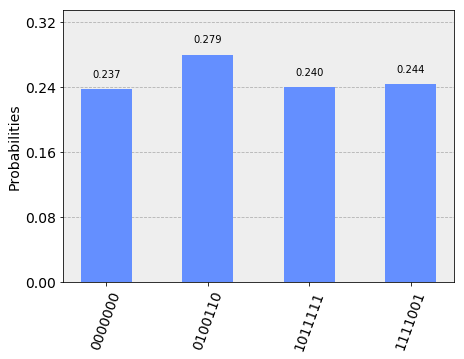

In [63]:
backend = Aer.get_backend('qasm_simulator')
job = execute(program, backend, shots=1000)
plot_histogram(job.result().get_counts(program))

In [64]:
n_qubits = 7
target_bell_pair = (3, 4)
results = job.result().get_counts(program)
{key[0]:value for key, value in results.items() if key[n_qubits-target_bell_pair[0]]=='0' and key[n_qubits-target_bell_pair[1]]=='0'}

{'0': 237}